In [ ]:
similar Properties of datapoints > clusters

# Steps

1. Select the value of k (no of clusters >> using Elbow Method)
2. Select random k centroid 
3. Calculate the distance between centroid and all datapoints
4. Assign each datapoints to closest/ nearest centroid / clusters
5. Update teh value of centroid by using mean of clusters datapoints
6. Keep iterating till there will be no change in centroid value or no movement in datapoints from cluster1 to cluster2 or vice versa

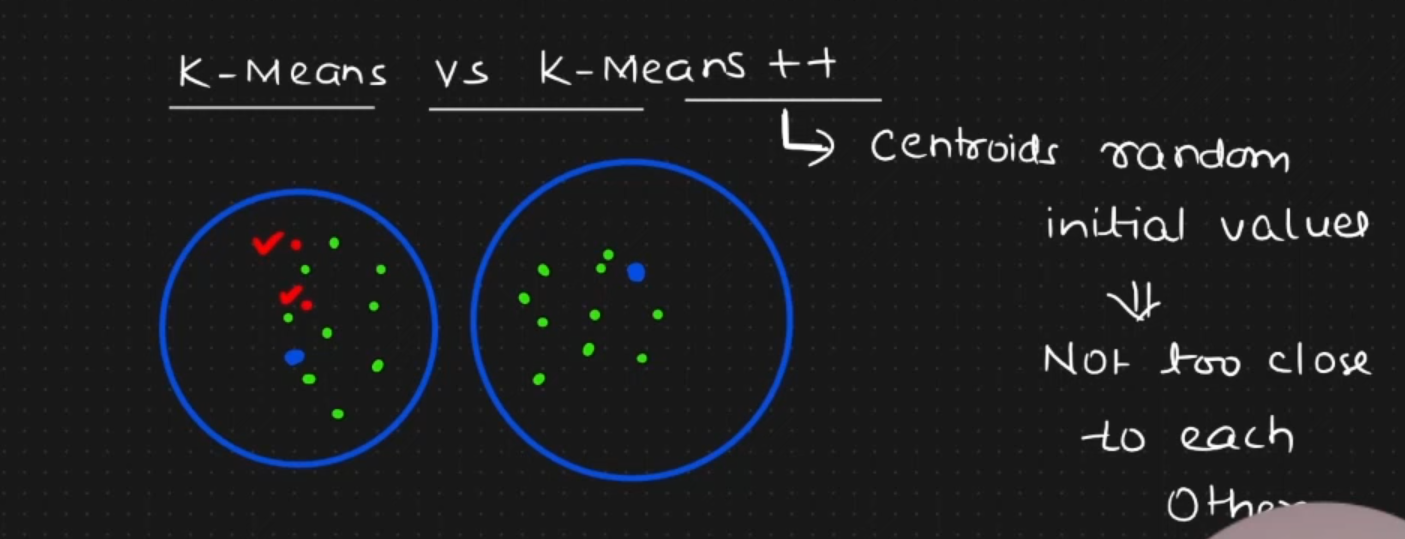

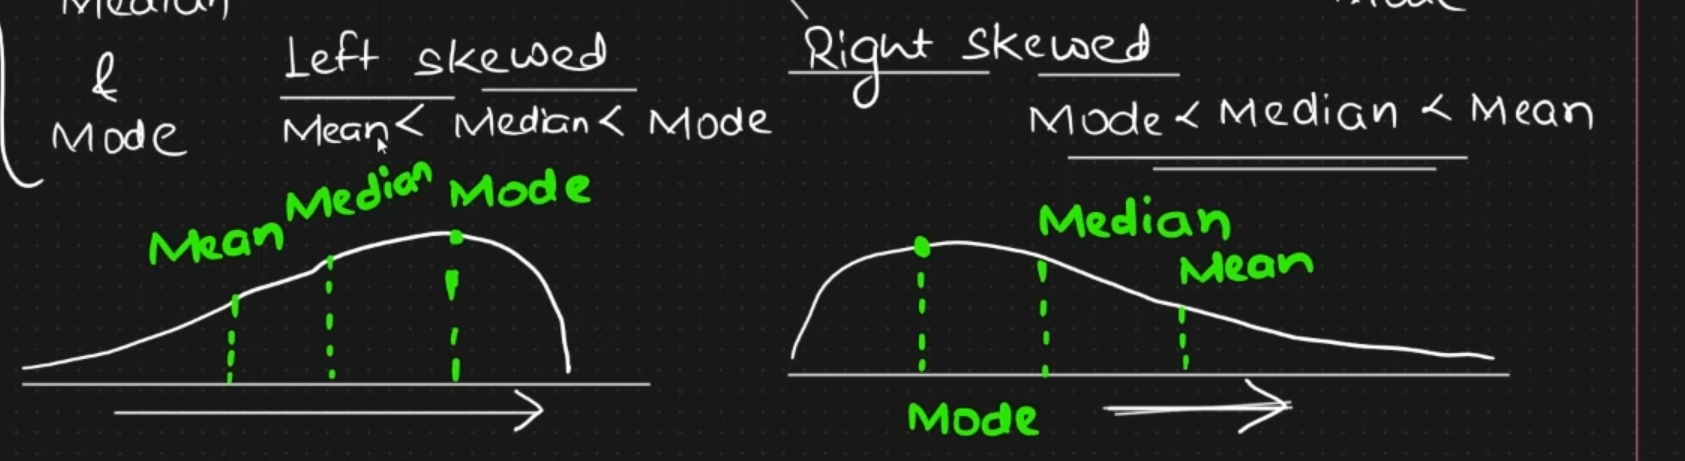

In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("E:/Data Science/PYTHON_NOTES/CSV/Country_clusters.csv")

In [3]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


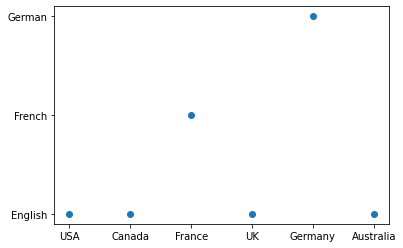

In [6]:
plt.scatter(df['Country'],df['Language'])

In [7]:
x=df[["Latitude","Longitude"]]

# model training

In [8]:
import warnings
warnings.filterwarnings("ignore")
kmean= KMeans(n_clusters=3)
kmean.fit(x)
y_pred =kmean.fit_predict(x)

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

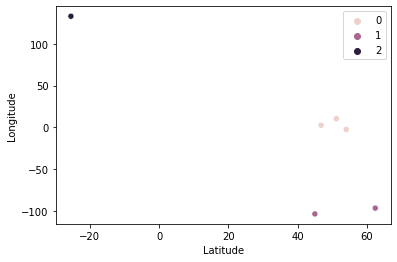

In [9]:
sns.scatterplot(df['Latitude'],df['Longitude'],hue=y_pred)

In [10]:
kmean.cluster_centers_

array([[  50.63666667,    3.42333333],
       [  53.685     , -100.285     ],
       [ -25.45      ,  133.11      ]])

In [11]:
kmean.inertia_

288.10523333333333

In [12]:
wcss_list =[]
k_range=range(1,7)
for i in k_range:
    kmean=KMeans(n_clusters=i)
    kmean.fit(x)
    wcss_list.append(kmean.inertia_)
wcss_list   

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

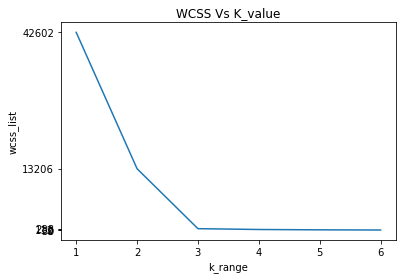

In [64]:
plt.plot(k_range,wcss_list)
plt.title("WCSS Vs K_value")
plt.xticks(k_range)
plt.yticks(wcss_list)
plt.xlabel('k_range')
plt.ylabel('wcss_list')

plt.show()

In [65]:
from sklearn.metrics import silhouette_score


In [75]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(x)
y_pred = kmeans_model.fit_predict(x)
silhouette_score(x,y_pred)

0.7232813961472381

In [13]:
x=df[["Latitude","Longitude"]]

# Model Training

In [6]:
import warnings
warnings.filterwarnings("ignore")

kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(x)
y_pred = kmeans_model.fit_predict(x)

In [13]:
y_pred

array([1, 1, 0, 0, 0, 2])

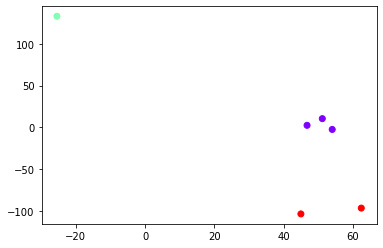

In [8]:
plt.scatter(x=df['Latitude'],y=df['Longitude'],c=y_pred,cmap="rainbow")

In [9]:
kmeans_model.cluster_centers_

array([[  50.63666667,    3.42333333],
       [ -25.45      ,  133.11      ],
       [  53.685     , -100.285     ]])

# wcss

In [10]:
wcss = kmeans_model.inertia_
wcss

288.10523333333333

In [11]:
kmeans_model = KMeans(n_clusters=1)
kmeans_model.fit(x)
wcss = kmeans_model.inertia_
wcss

42601.91356666667

In [15]:
wcss_list =[]
k_values = range(1,7)
for i in k_values:
    kmeans_model = KMeans(n_clusters=i)
    kmeans_model.fit(x)
    wcss = kmeans_model.inertia_
    wcss_list.append(wcss)
wcss_list

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

Text(0.5, 1.0, 'Elbow Method')

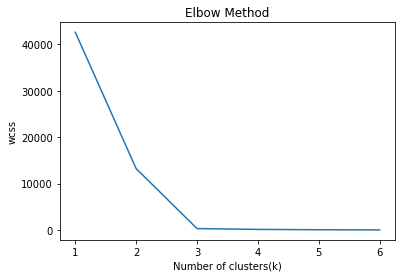

In [17]:
plt.plot(k_values,wcss_list)
plt.xlabel("Number of clusters(k)")
plt.ylabel("wcss")
plt.title("Elbow Method")

In [ ]:
# note we got two elbow 

In [19]:
# to validate which elbow point means no of cluster has more accuracy

# Silhouette_score

In [66]:
# To know how well data points are fitting to clusters

from sklearn.metrics import silhouette_score

kme =KMeans(n_clusters=1)
kme.fit(x)
ypredict =kme.fit_predict(x)
ypredict

array([1, 1, 0, 0, 0, 2])

In [22]:
silhouette_sco =silhouette_score(x,y_pred)
silhouette_sco

0.7232813961472381

# we will work  on Random Forest using kmean Cluster 

In [62]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [63]:
import pandas as pd 
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [64]:
df =pd.read_csv("D:/PYTHON_NOTES/CSV/diabetes.csv")

In [65]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [66]:
x=df.drop('Outcome',axis=1)

In [67]:
kmean= KMeans(n_clusters=2)
kmean.fit(x)
y_pred= kmean.predict(x)
silhouette_score(x,y_pred)

C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.5687897205830247

In [4]:
"within-cluster sum of squares."

'within-cluster sum of squares.'

In [84]:
List =[]
k_rangee =range(1,10)
for i in k_rangee:
    cluster =KMeans(n_clusters=i)
    cluster.fit(x)
    List.append(cluster.inertia_)

C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmea

In [85]:
List

[11615812.918327227,
 5142376.455984382,
 2913322.58008178,
 2150574.716370744,
 1737324.9738019144,
 1466807.6543065675,
 1303177.0065288087,
 1138141.8338285643,
 1001772.5251423422]

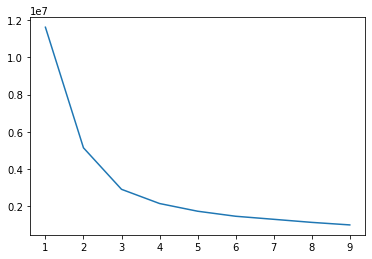

In [86]:
plt.plot(k_rangee,List)

In [ ]:
k = KMeans(n_clusters=2)
k.fit(x)
pred = k.fit_predict(x)
sil

# train_test_split

In [69]:
x=df.drop("Outcome",axis=1)
y=df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)



# model training

In [70]:
Random_forest = RandomForestClassifier()
Random_forest.fit(x_train,y_train)


RandomForestClassifier()

# model evalution

In [71]:
# training
y_pred_train = Random_forest.predict(x_train)

accuracy_score_= accuracy_score(y_train,y_pred_train)
accuracy_score_

1.0

In [72]:
# testing
y_pred_test = Random_forest.predict(x_test)

accuracy_score_=accuracy_score(y_test,y_pred_test)
accuracy_score_

0.7402597402597403

In [73]:
score 

NameError: name 'score' is not defined

# check accuracy by doing  value addition in existing dataset 

In [82]:
# step-1 to get n_cluster
wcss_list =[]
k_values =range(1,7)
for i in k_values:
    model_ = KMeans(n_clusters=i)
    model_.fit(x)
    wcss = model_.inertia_
    wcss_list.append(wcss)


wcss_list

C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmea

In [83]:
List

[11615812.918327227,
 5142376.455984382,
 2913322.58008178,
 2151024.945530346,
 1737626.3385149883,
 1466740.4084335377]

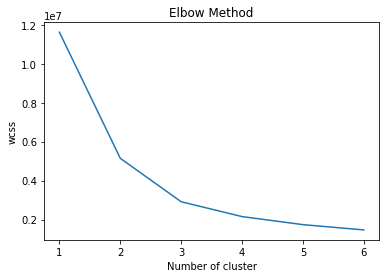

In [12]:
plt.plot(k_values,wcss_list)
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.show()

after Elbow method we got 2 cluster ie cluster 2,3
so will valid that cluster which is most accurate

In [13]:
from sklearn.metrics import silhouette_score
# for cluster =2
cal = KMeans(n_clusters=2)
cal.fit(x)
pred_2 = cal.fit_predict(x)

silh_score_2 = silhouette_score(x,pred_2)
silh_score_2

C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.5687897205830247

In [14]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [15]:
# for cluster =3
cal = KMeans(n_clusters=3)
cal.fit(x)
pred_3 = cal.fit_predict(x)

silh_score_3 = silhouette_score(x,pred_3)
silh_score_3

C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Ankit\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.5104287492214447

from above obseravation we conclude that cluster =2 has more accurate

# we will do value addition in data

In [16]:
df["New_feature"]=pred_2

# again we will check accuracy

In [17]:
x = df.drop("Outcome",axis=1) 
y = df["Outcome"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [18]:
Random_forest = RandomForestClassifier()
Random_forest.fit(x_train,y_train)


RandomForestClassifier()

In [19]:
# training
y_pred_train = Random_forest.predict(x_train)

accuracy_score_=accuracy_score(y_train,y_pred_train)
accuracy_score_

1.0

In [20]:
# testing
y_pred_test = Random_forest.predict(x_test)

accuracy_score_=accuracy_score(y_test,y_pred_test)
accuracy_score_

0.7532467532467533

initial accuracy was 72% 
after value addition got accuracy 75%

In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_feature
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,1
765,5,121,72,23,112,26.2,0.245,30,0,1
766,1,126,60,0,0,30.1,0.349,47,1,1


In [ ]:
x_trian,x_test,y_train,y_test= train_test_split()

In [22]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_feature
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,1
765,5,121,72,23,112,26.2,0.245,30,1
766,1,126,60,0,0,30.1,0.349,47,1
